### Logistic Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [3]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

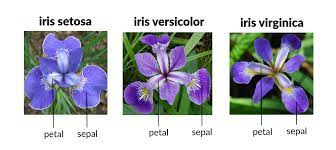

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y features

In [8]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Apply Label Encoding on Species column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species']=le.fit_transform(Y['species'])

In [11]:
Y['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Apply Preprocessing Pipeline on X feature

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [17]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Seperate Train Test data

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [19]:
xtrain.shape

(100, 4)

In [20]:
xtest.shape

(50, 4)

### Create a Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
model.intercept_

array([-0.16045841,  1.82152872, -1.66107032])

In [23]:
model.coef_

array([[-0.93375819,  1.24850197, -1.63941954, -1.61201946],
       [ 0.38313791, -0.37212671, -0.40450566, -0.60163442],
       [ 0.55062029, -0.87637526,  2.0439252 ,  2.21365388]])

### Predict training and testing data

In [24]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [25]:
ypred_tr[0:5]

array([1, 0, 1, 2, 1])

In [26]:
ytrain.head()

,species
52,1
49,0
65,1
118,2
55,1


In [27]:
ypred_ts[0:5]

array([1, 0, 0, 0, 1])

In [28]:
ytest.head()

,species
92,1
44,0
7,0
21,0
95,1


### Evaluate the model

In [29]:
# Accuracy for training
model.score(xtrain,ytrain)

0.98

In [30]:
# Accuracy for testing
model.score(xtest,ytest)

0.94

In [31]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,ypred_tr)
tr_acc

0.98

In [32]:
ts_acc = accuracy_score(ytest,ypred_ts)
ts_acc

0.94

### View the confusion matrix for test data

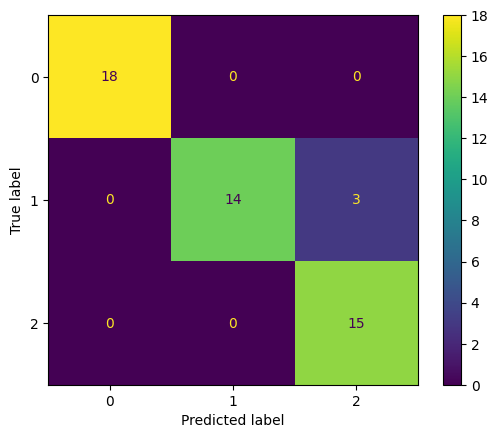

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [34]:
(18+14+15)/50

0.94

### Print the classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Getting the orignal species from predictions

In [36]:
model.predict_proba(xtest)

array([[2.06349625e-02, 9.12983142e-01, 6.63818957e-02],
       [9.87155547e-01, 1.28438943e-02, 5.58381230e-07],
       [9.72240034e-01, 2.77594519e-02, 5.13857865e-07],
       [9.85931171e-01, 1.40684351e-02, 3.93678025e-07],
       [8.82040990e-02, 8.60869769e-01, 5.09261315e-02],
       [1.33812491e-02, 8.24362786e-01, 1.62255965e-01],
       [9.41440024e-01, 5.85584236e-02, 1.55292296e-06],
       [2.52403741e-03, 2.09773808e-01, 7.87702154e-01],
       [9.61572403e-01, 3.84258819e-02, 1.71544733e-06],
       [9.91470838e-01, 8.52901569e-03, 1.46703679e-07],
       [2.64080839e-02, 9.47915023e-01, 2.56768935e-02],
       [9.51727098e-02, 8.43219588e-01, 6.16077027e-02],
       [6.93636243e-05, 2.64485214e-02, 9.73482115e-01],
       [8.06124420e-05, 2.11515814e-02, 9.78767806e-01],
       [9.23007969e-01, 7.69854728e-02, 6.55792542e-06],
       [2.52519874e-03, 4.14376549e-01, 5.83098252e-01],
       [7.95663122e-03, 4.24165237e-01, 5.67878131e-01],
       [1.53071523e-02, 8.47207

In [37]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [38]:
ypred_tr_lb

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       've

In [39]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)

### Predicting for new data

In [40]:
df_new = df.sample(10)
df_new

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,versicolor
68,6.2,2.2,4.5,1.5,versicolor
18,5.7,3.8,1.7,0.3,setosa
57,4.9,2.4,3.3,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
134,6.1,2.6,5.6,1.4,virginica
139,6.9,3.1,5.4,2.1,virginica
44,5.1,3.8,1.9,0.4,setosa
55,5.7,2.8,4.5,1.3,versicolor
124,6.7,3.3,5.7,2.1,virginica


In [41]:
Ynew = df_new[['species']]

In [42]:
Ynew

,species
54,versicolor
68,versicolor
18,setosa
57,versicolor
62,versicolor
134,virginica
139,virginica
44,setosa
55,versicolor
124,virginica


In [43]:
df_new = df_new.drop(labels=['species'],axis=1)

In [44]:
df_new

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
68,6.2,2.2,4.5,1.5
18,5.7,3.8,1.7,0.3
57,4.9,2.4,3.3,1.0
62,6.0,2.2,4.0,1.0
134,6.1,2.6,5.6,1.4
139,6.9,3.1,5.4,2.1
44,5.1,3.8,1.9,0.4
55,5.7,2.8,4.5,1.3
124,6.7,3.3,5.7,2.1


In [45]:
df_new.to_csv('sample.csv',index=False)

### Read samples.csv

In [46]:
df2 = pd.read_csv('sample.csv')
df2

,sepal_length,sepal_width,petal_length,petal_width
0,6.5,2.8,4.6,1.5
1,6.2,2.2,4.5,1.5
2,5.7,3.8,1.7,0.3
3,4.9,2.4,3.3,1.0
4,6.0,2.2,4.0,1.0
5,6.1,2.6,5.6,1.4
6,6.9,3.1,5.4,2.1
7,5.1,3.8,1.9,0.4
8,5.7,2.8,4.5,1.3
9,6.7,3.3,5.7,2.1


In [47]:
import numpy as np
def predict_data(df, num_pipe, le, model):
    xnew = num_pipe.transform(df)
    xnew = pd.DataFrame(xnew,columns=num_pipe.get_feature_names_out())
    pred = model.predict(xnew)
    prob = model.predict_proba(xnew)    
    pred_lb = le.inverse_transform(pred)
    return pred_lb,prob

In [48]:
pred, prob = predict_data(df2, num_pipe, le, model)

In [49]:
pred

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [50]:
prob

array([[4.66549941e-03, 6.79182926e-01, 3.16151574e-01],
       [7.18102898e-04, 5.66257139e-01, 4.33024758e-01],
       [9.74862074e-01, 2.51372813e-02, 6.45082860e-07],
       [8.65824687e-02, 9.01032886e-01, 1.23846457e-02],
       [4.53701756e-03, 9.41417750e-01, 5.40452329e-02],
       [1.39303234e-03, 3.98990491e-01, 5.99616476e-01],
       [2.58738798e-04, 9.06803497e-02, 9.09060912e-01],
       [9.87155547e-01, 1.28438943e-02, 5.58381230e-07],
       [2.87506448e-02, 8.34342620e-01, 1.36906735e-01],
       [5.32608043e-04, 7.94094542e-02, 9.20057938e-01]])

In [51]:
Ynew['predicted']=pred

In [52]:
Ynew

,species,predicted
54,versicolor,versicolor
68,versicolor,versicolor
18,setosa,setosa
57,versicolor,versicolor
62,versicolor,versicolor
134,virginica,virginica
139,virginica,virginica
44,setosa,setosa
55,versicolor,versicolor
124,virginica,virginica
